In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
# Read data
iris = datasets.load_iris()
# Extract the last 2 columns
X = iris.data
y = iris.target
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
# Standardization
sc = StandardScaler()
sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

X_train_std = X_train
X_test_std = X_test

In [65]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train, y_train,
        batch_size=2,
        epochs=100, 
        verbose=1)

Epoch 1/100
53/53 [==============================] - 0s 415us/step - loss: 1.1816 - accuracy: 0.2857
Epoch 2/100
53/53 [==============================] - 0s 359us/step - loss: 1.1007 - accuracy: 0.2190
Epoch 3/100
53/53 [==============================] - 0s 340us/step - loss: 1.0455 - accuracy: 0.3238
Epoch 4/100
53/53 [==============================] - 0s 340us/step - loss: 1.0008 - accuracy: 0.4476
Epoch 5/100
53/53 [==============================] - 0s 359us/step - loss: 0.9670 - accuracy: 0.6667
Epoch 6/100
53/53 [==============================] - 0s 340us/step - loss: 0.9293 - accuracy: 0.6667
Epoch 7/100
53/53 [==============================] - 0s 340us/step - loss: 0.8962 - accuracy: 0.7905
Epoch 8/100
53/53 [==============================] - 0s 340us/step - loss: 0.8587 - accuracy: 0.6952
Epoch 9/100
53/53 [==============================] - 0s 359us/step - loss: 0.8232 - accuracy: 0.7333
Epoch 10/100
53/53 [==============================] - 0s 352us/step - loss: 0.7915 - accura

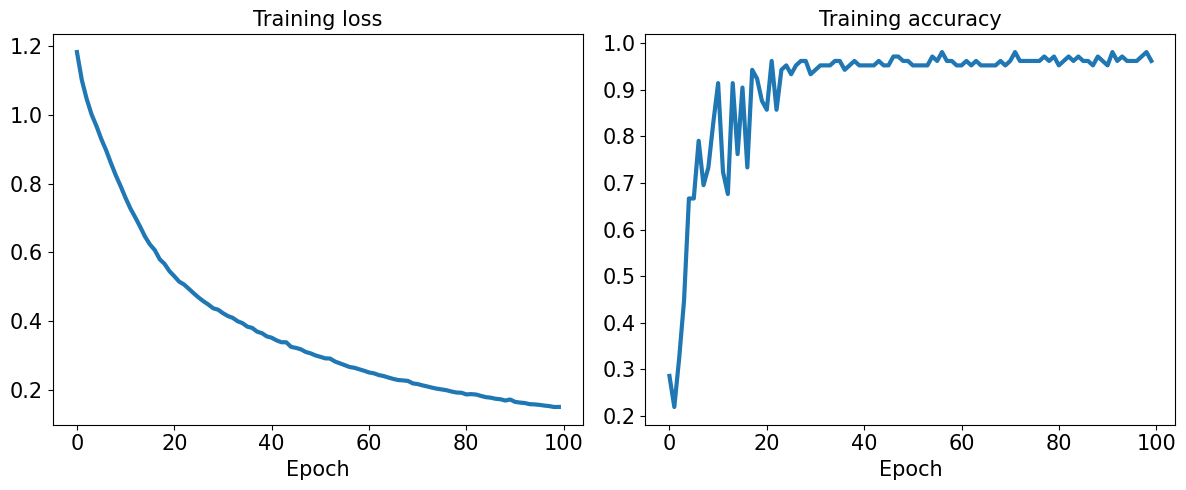

In [67]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

In [68]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.1311   Test Acc.: 0.9778


In [69]:
y_pred = model(X_test)
print(y_pred.shape)

(45, 3)


In [70]:
print(y_pred)

tf.Tensor(
[[1.5805547e-04 1.0123862e-01 8.9860326e-01]
 [9.8646808e-01 1.3527481e-02 4.4624999e-06]
 [9.8407596e-01 1.5919089e-02 4.9825444e-06]
 [5.5526826e-04 2.5851092e-01 7.4093378e-01]
 [1.5311319e-02 8.8745528e-01 9.7233422e-02]
 [2.1058224e-02 9.1025770e-01 6.8684071e-02]
 [1.1692878e-04 1.0775388e-01 8.9212918e-01]
 [1.4361535e-03 4.6563935e-01 5.3292453e-01]
 [2.2107144e-04 1.4829069e-01 8.5148829e-01]
 [9.8973697e-01 1.0259934e-02 3.0594531e-06]
 [9.9162221e-01 8.3755534e-03 2.2500153e-06]
 [1.1629355e-03 3.6624864e-01 6.3258839e-01]
 [9.7723085e-01 2.2761555e-02 7.5878193e-06]
 [4.3719850e-02 9.2848176e-01 2.7798379e-02]
 [9.8345643e-01 1.6538735e-02 4.7615449e-06]
 [6.2694922e-03 7.8163511e-01 2.1209535e-01]
 [1.9706745e-04 1.2043405e-01 8.7936890e-01]
 [5.6581637e-03 7.3051965e-01 2.6382223e-01]
 [1.8190112e-02 9.0625232e-01 7.5557619e-02]
 [3.6063290e-04 1.8631212e-01 8.1332731e-01]
 [1.0662319e-04 8.9809917e-02 9.1008347e-01]
 [9.8327994e-01 1.6715614e-02 4.4351373e-06]

In [71]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [72]:
probability_model(X_test)

<tf.Tensor: shape=(45, 3), dtype=float32, numpy=
array([[0.219195  , 0.24250984, 0.5382951 ],
       [0.5711469 , 0.21587636, 0.21297672],
       [0.57026565, 0.21657684, 0.2131575 ],
       [0.22773804, 0.2947571 , 0.47750494],
       [0.22334364, 0.53424555, 0.24241078],
       [0.22311671, 0.54288334, 0.23399992],
       [0.21960269, 0.24455908, 0.5358382 ],
       [0.23298028, 0.37061247, 0.39640728],
       [0.2221133 , 0.25756115, 0.5203256 ],
       [0.57234997, 0.21492165, 0.21272849],
       [0.573043  , 0.21437226, 0.21258476],
       [0.23143184, 0.3334094 , 0.43515873],
       [0.56773955, 0.21858905, 0.21367145],
       [0.22693169, 0.54972106, 0.22334722],
       [0.57003725, 0.21675853, 0.21320413],
       [0.2272766 , 0.49350518, 0.2792182 ],
       [0.2204261 , 0.24858864, 0.5309853 ],
       [0.22941059, 0.47360557, 0.29698378],
       [0.22274391, 0.54136026, 0.23589583],
       [0.22426802, 0.2701003 , 0.5056317 ],
       [0.21843052, 0.23893017, 0.5426393 ],
      